# Clean Notebook

Todo:
- Copy Code from midterm
- write loop
- write function
- clean up

## Housekeeping

Step One: Imports! <br>
Step Two: Create a list of FIPs codes that we can use for multiple maps --> Defined as "Our_FIPs"<br>

In [6]:
# import everything we need

import pandas as pd
import geopandas as gpd

import plotly.express as px
import osmnx as ox
import contextily as ctx
import matplotlib.pyplot as plt
import xyzservices.providers as xyz

In [17]:
## Set up some variables
Our_FIPs = [ '06025012301','06025010200',
               '06025010300','06025010400',
               '06025010500','06025010600',
               '06025010700','06025011000',
               '06025011300','06025011400',
               '06025011802','06025011202',
               '06025011201','06025010900',
               '06025010800','06025010300',
               '06025012400','06025010101',
               '06065045604','06065046900',
               '06065045609','06065045606',
               '06065940400','06065045216',
               '06065045304','06065045707',
               '06065045609','06065045605',
               '06065045608','06065045224',
               '06065045606','06065045608',
               '06065045605','06065044403',
               '06073021000','06025012301',
               '06065045605','06025011900',
               '06025011100','06025012302',
               '06025010102','06025011803',
               '06025011600','06025011801',
               '06025012200','06025012100',
               '06025012002','06025011700',
               '06025011500','06065045706',
               '06065045703','6065045705',
               '06065045704'
             ]

## Renewable Energy Development

Step One: Pull all data on power plants from open street map using set coordinates as geographic parameter and define that new data set as "osm_power" <br>
Step Two: Set the crs to espg=4236 <br>
Steo Three: Plot osm_power <br>
Step Four: Add the Esri.WorldImagry basemap

In [15]:
osm_power = ox.geometries_from_bbox(33.334227468796854, 32.65492287146084, -115.83365958918598, -115.25770254774852, tags={'power':'plant'})

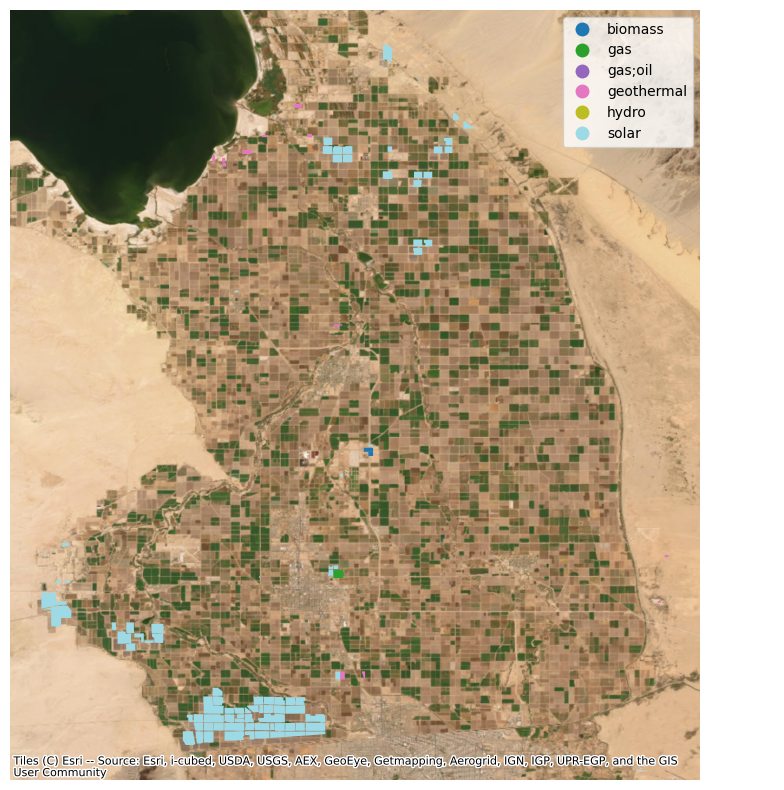

In [16]:
osm_power = osm_power.to_crs(epsg=4236)

fig, ax = plt.subplots(figsize=(10,10))

osm_power.plot(ax=ax,
         column='plant:source',
         cmap='tab20',
         legend=True)

ax.axis('off')

ctx.add_basemap(ax=ax,
                crs=osm_power.crs.to_string(),
                source=xyz.Esri.WorldImagery
                )

## Waterways in the Imperial Valley
Step One: Pull all data on waterways from open street map using set coordinates as geographic parameter and define that new data set as "osm_water" <br>
Step Two: Set the crs to espg=4236 <br>
Steo Three: Plot osm_water <br>
Step Four: Add the Esri.WorldImagry basemap

In [13]:
osm_water = ox.geometries_from_bbox(33.334227468796854, 32.65492287146084, -115.83365958918598, -115.25770254774852, tags={'waterway':True})

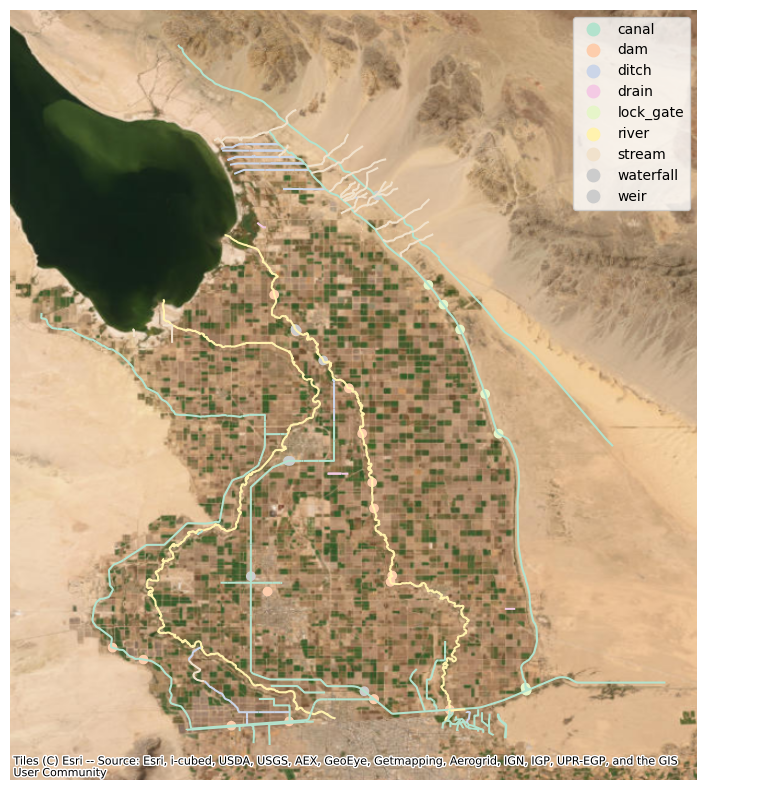

In [14]:
osm_water = osm_water.to_crs(epsg=4236)

fig, ax = plt.subplots(figsize=(10,10))

osm_water.plot(ax=ax,
         column='waterway',
         cmap='Pastel2',
         legend=True)

ax.axis('off')

ctx.add_basemap(ax=ax,
                crs=osm_power.crs.to_string(),
                source=xyz.Esri.WorldImagery
                )

## Asthma Mapping
Step One: Get the asthma data from calenviroscreen data<br>
Step Two: Clean up the FIPs Codes by changing to strings and adding leading zeros<br>
Step Three: Create a geodataframe that is just made up of the FIPs codes / census tracts we defined under above (see housekeeping)<br>
Step Four: Plot 'AsthmaP' variable from CalEnviroScreen over the Esri.WorldImgry Map <br>

- 'AsthmaP' variable describes how the rates in a given tract compares to other tracts across the state (percentile) <br>
- For example, a dark region in the 90th percentile means that the rates in that tract are higher than 90% of all other tracts<br>

Step Five: Plot Asthma variable from CalEnviroscreen over the Esri.WorldImagry Map <br>
- 'Asthma' variable is the number of trips to the emergency department per 10,000 people


In [36]:
calenviro_file = "data/CalEnviroScreen/calenviroscreen.zip"
calenviro = gpd.read_file(asthma_file)

calenviro['Tract'] = calenviro['Tract'].astype('int')
calenviro['Tract'] = calenviro['Tract'].astype('str')
calenviro["Tract"] = calenviro["Tract"].str.zfill(11)

calenv_gdf= calenviro[calenviro['Tract'].isin(Our_FIPs)]

(-116.98409285041606,
 -114.32948814952228,
 32.54557930245018,
 34.15294612860471)

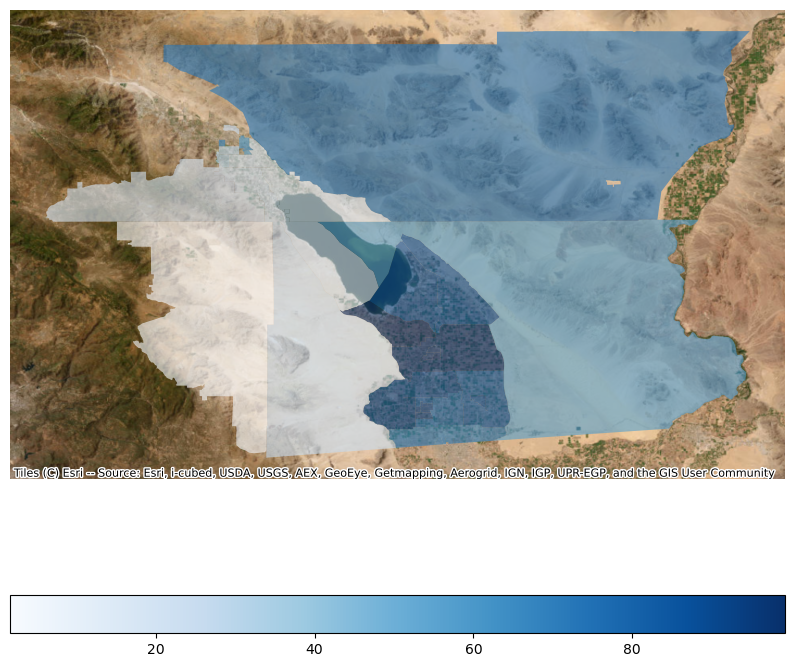

In [37]:
# Step Four
calenv_gdf = calenv_gdf.to_crs(epsg=4236)

fig,ax = plt.subplots(figsize=(10,10))

calenv_gdf.plot(ax=ax,
               column='AsthmaP',
               legend=True,
               cmap='Blues',
               alpha=0.6,
              legend_kwds={"orientation": "horizontal"}
              )

ctx.add_basemap(ax=ax,
                crs=calenv_gdf.crs.to_string(),
                source=ctx.providers.Esri.WorldImagery
                )

ax.axis('off')

(-116.98409285041606,
 -114.32948814952228,
 32.54557930245018,
 34.15294612860471)

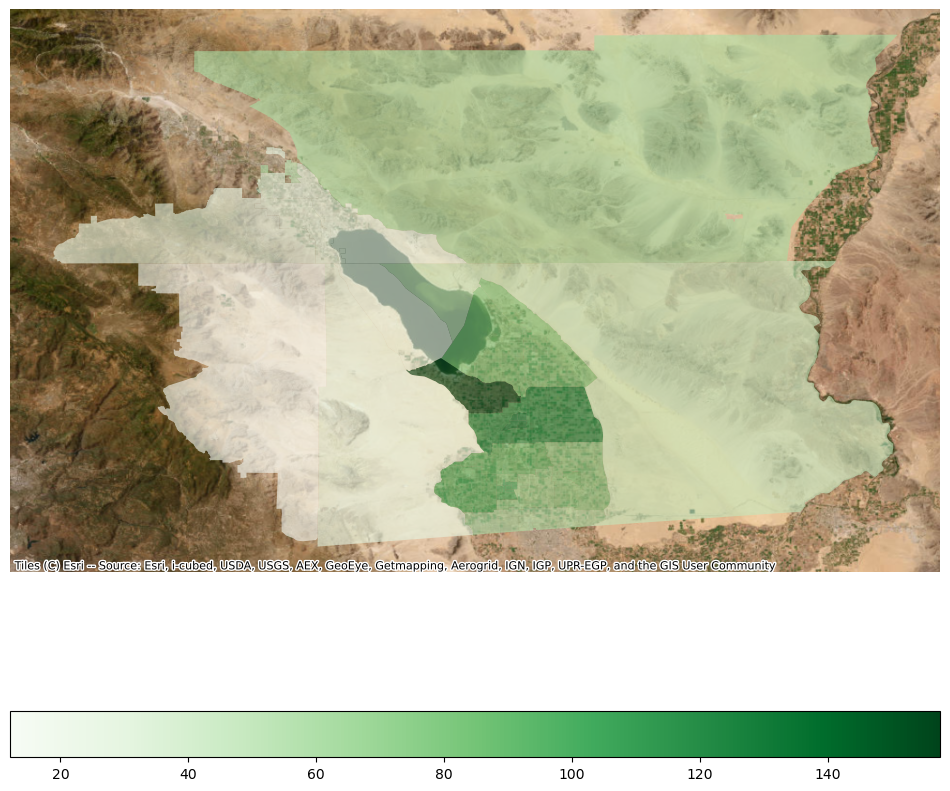

In [39]:
calenv_gdf = calenv_gdf.to_crs(epsg=4236)

fig,ax = plt.subplots(figsize=(12,12))

calenv_gdf.plot(ax=ax,
               column='Asthma',
               legend=True,
               cmap='Greens',
               alpha=0.6,
              legend_kwds={"orientation": "horizontal"}
              )

ctx.add_basemap(ax=ax,
                crs=calenv_gdf.crs.to_string(),
                source=ctx.providers.Esri.WorldImagery
                )

ax.axis('off')

### Credits

Maggie: Renewable Energy Development, Waterways in the Imerial Valley, Asthma Mapping